In [1]:
#demo
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score



In [2]:
X,y = make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1, noise=50)


In [3]:
df = pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],'target':y})


In [4]:
df.head()

,feature1,feature2,target
0,0.100025,0.750458,20.592631
1,0.737033,-0.654747,10.331298
2,0.749081,0.613746,155.845800
3,-0.059180,-0.450410,-76.904033
4,1.568885,-0.913903,-1.616747


In [5]:
df.shape

(100, 3)

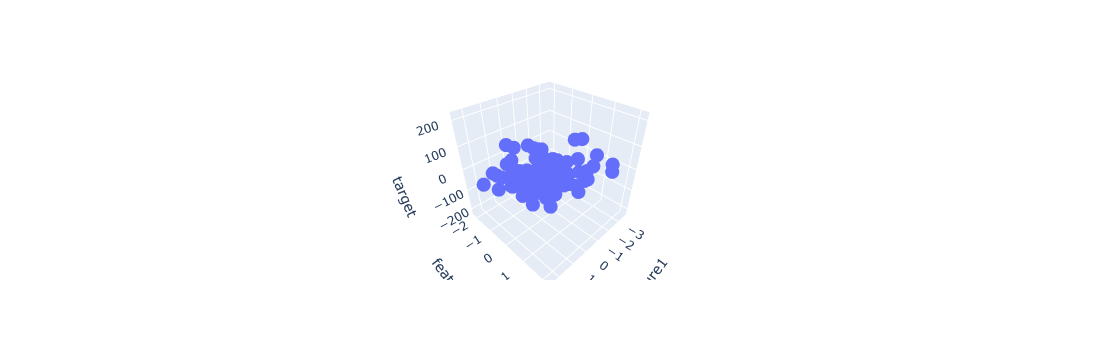

In [8]:
fig = px.scatter_3d(df,x='feature1',y='feature2',z='target')
fig.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X_train,y_train)

LinearRegression()

In [13]:
y_pred = lr.predict(X_test)

In [14]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2_Score",r2_score(y_test,y_pred))

MAE 45.17082554165505
MSE 3724.5435371354565
R2_Score 0.6772237685004465


In [17]:
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)

# Create a meshgrid
xGrid, yGrid = np.meshgrid(x, y)

# Stack xGrid and yGrid into a (100, 2) array for prediction
final = np.vstack((xGrid.ravel(), yGrid.ravel())).T

# Predict using the model
z_final = lr.predict(final).reshape(10, 10)

# Assign the reshaped predictions to z
z = z_final

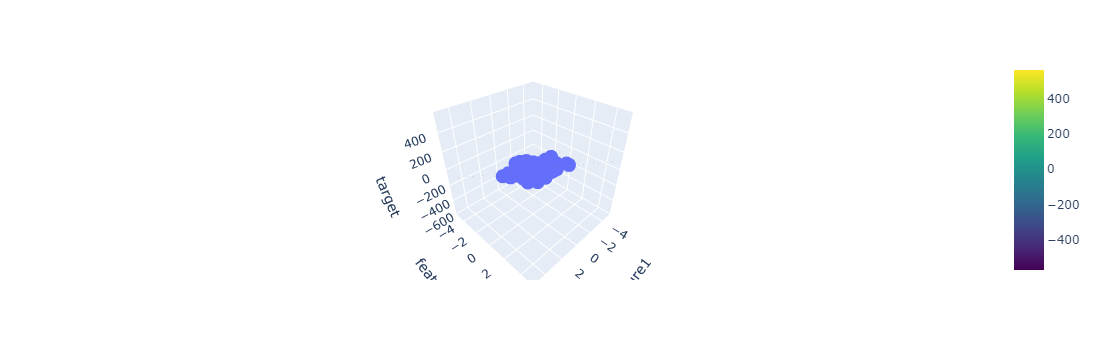

In [18]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

# Add the surface plot (ensure x, y, z are in grid format for Surface)
fig.add_trace(go.Surface(x=xGrid, y=yGrid, z=z, colorscale='Viridis', opacity=0.5))

# Show the plot
fig.show()

In [19]:
lr.coef_

array([46.44227752, 66.73194557])

In [20]:
lr.intercept_

-5.488858070859104